# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
Observation 1: Over the course of 35 days, Capomulin treatment demonstrates the ability to suppress tumor growth, as evident in the case of mouse ID l509.

Observation 2: There appears to be a positive correlation between mouse weight and average tumor size, suggesting that mice with higher weights tend to have larger average tumors.

Observation 3: Based on the provided dataset, Capomulin and Ramicane exhibit more favorable outcomes compared to Infubinol and Ceftamin as potential treatment options.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df=pd.merge(study_results, mouse_metadata,on='Mouse ID')

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
mice_count = combined_df['Mouse ID'].nunique()

print(mice_count)


249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_row_df = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_row_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_ids =duplicate_row_df['Mouse ID'].unique()
duplicated_mouse_ids

array(['g989'], dtype=object)

In [6]:
bad_mouse_series = combined_df['Mouse ID'].isin(duplicated_mouse_ids)
bad_mouse_series

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [7]:
combined_df[bad_mouse_series]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined = combined_df[~bad_mouse_series]
cleaned_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [16]:
# Checking the number of mice in the clean DataFrame.
cleaned_combined = combined_df[~bad_mouse_series]
number_of_mice = cleaned_combined['Mouse ID'].nunique()
print(number_of_mice)

248


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


summary_stats = cleaned_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats = summary_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Std Dev', 'sem': 'SEM'})
summary_stats

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_single_line = cleaned_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

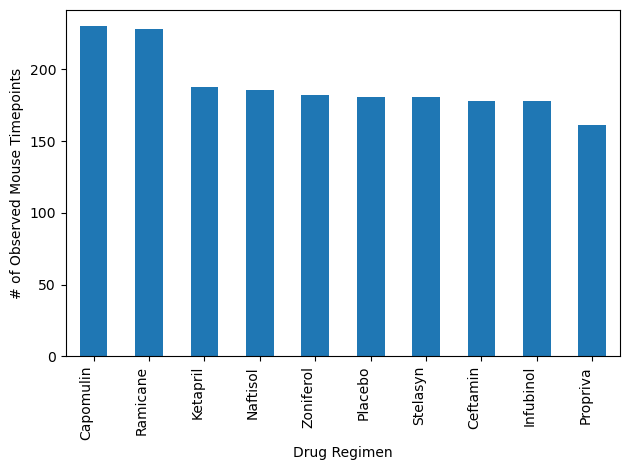

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts=combined_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
drug_counts.plot(kind='bar', x='Drug Regimen', y='Mouse ID/Timepoints')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

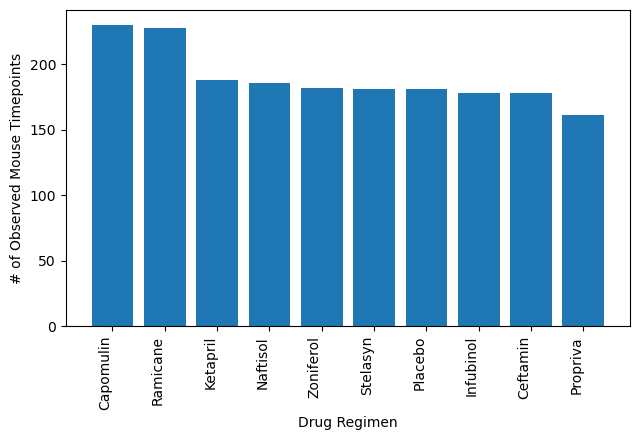

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens=combined_df['Drug Regimen'].value_counts()
drug_regimen_labels=drug_regimens.index.to_numpy()
drug_counts_2=drug_regimens.to_numpy()
plt.figure(figsize=(6.5,4.5))
plt.bar(drug_regimen_labels,drug_counts_2)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

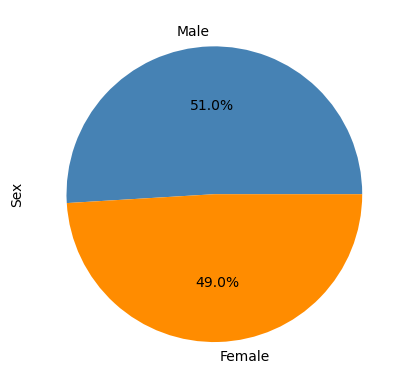

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts=cleaned_combined['Sex'].value_counts()
gender_counts.plot(kind='pie',autopct='%1.1f%%', colors=['steelblue', 'darkorange'],ylabel='Sex')
#plt.legend(gender_counts.index,loc='center left', title='Sex')
plt.show()

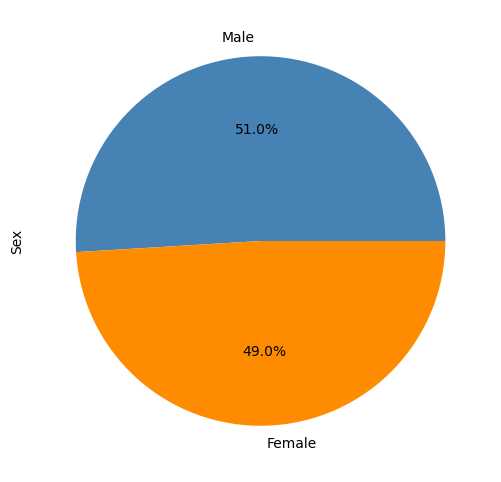

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#drug_regimens=combined_df['Drug Regimen'].value_counts()
#drug_regimen_labels=drug_regimens.index.to_numpy()

gender_counts_2=cleaned_combined_df['Sex'].value_counts()
#gender_labels_2=gender_counts_2.index.astype
gender_labels_2=gender_counts_2.index
pie_slices=gender_counts_2/gender_counts.sum()
plt.figure(figsize=(6,6))
plt.pie(pie_slices, labels=gender_labels_2, autopct='%1.1f%%', colors=['steelblue','darkorange'])
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


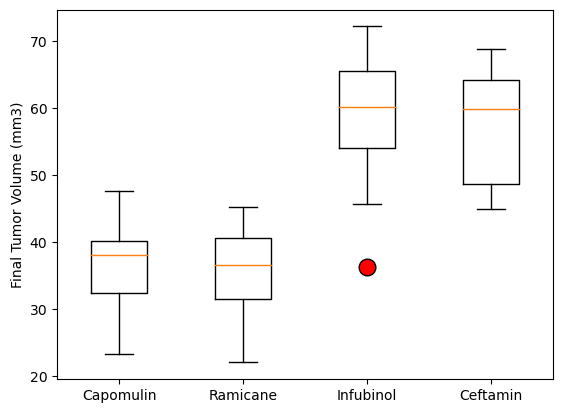

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoints = cleaned_combined_df.groupby('Mouse ID')['Timepoint'].max()

merged_data = pd.merge(cleaned_combined_df, last_timepoints, on=['Mouse ID', 'Timepoint'])

treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(treatment_regimens)]

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

tumor_vol_data = []


for treatment in treatment_regimens:
    treatment_data = filtered_data[filtered_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
   
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
   
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
   
    tumor_vol_data.append(treatment_data)
   
    print(f"Outliers for {treatment}: {outliers}")

# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, markeredgecolor='black')
fig, axs = plt.subplots()
axs.boxplot(tumor_vol_data, labels=treatment_regimens, flierprops=flierprops)
axs.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

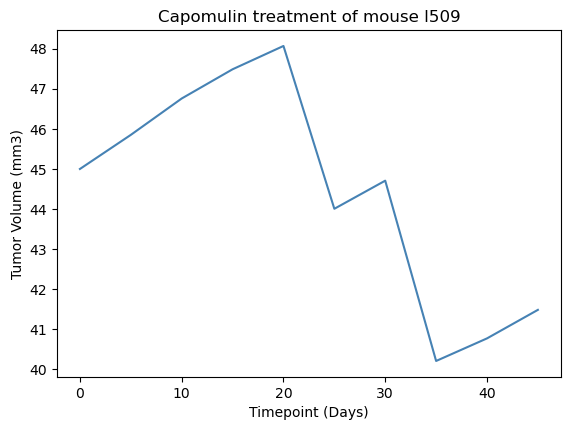

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_combined_df[cleaned_combined_df['Drug Regimen'] == 'Capomulin']
selected_mouse_id = 'l509'
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]
plt.figure(figsize=(6.5, 4.5))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], linestyle='-', color='steelblue')

plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {selected_mouse_id}')

plt.grid(False)
plt.show()

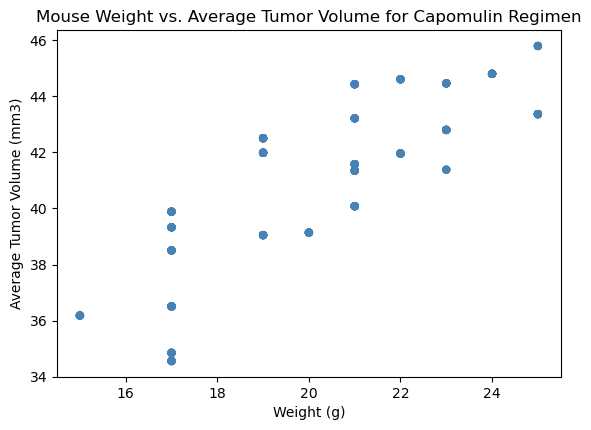

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_data = cleaned_combined_df[cleaned_combined_df['Drug Regimen']=='capomulin']
average_tumor_Volume =capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values(ascending=True)
Capomulin_merged_data = pd.merge(capomulin_data, average_tumor_Volume, on='Mouse ID', suffixes=('_individual', '_average'))
plt.figure(figsize=(6.5, 4.5))
plt.scatter(Capomulin_merged_data['Weight (g)'], Capomulin_merged_data['Tumor Volume (mm3)_average'], marker='o', color ='steelblue', edgecolors='none')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumore volume is 0.83


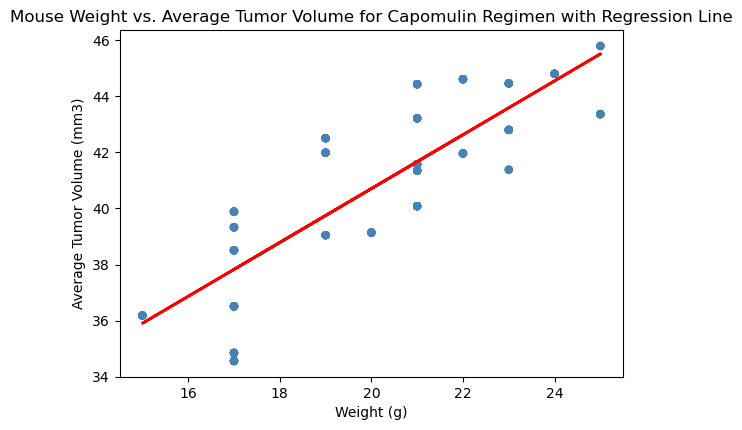

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import pearsonr, linregress
correlation_coefficient, _ = pearsonr(Capomulin_merged_data['Weight (g)'], Capomulin_merged_data['Tumor Volume (mm3)_average'])
formatted_correlation = round(correlation_coefficient, 2)
print(f'The correlation between mouse weight and the average tumore volume is {formatted_correlation}')
slope, intercept, r_value, p_value, std_err = linregress(Capomulin_merged_data['Weight (g)'], Capomulin_merged_data['Tumor Volume (mm3)_average'])
plt.figure(figsize=(6.5, 4.5))
plt.scatter(Capomulin_merged_data['Weight (g)'], Capomulin_merged_data['Tumor Volume (mm3)_average'], marker='o', color='steelblue', edgecolors='none')
plt.plot(Capomulin_merged_data['Weight (g)'], slope * Capomulin_merged_data['Weight (g)'] + intercept, color='red', linestyle='-', linewidth=2)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen with Regression Line')
plt.show()